In [1]:
#Importing data and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal
import os
import warnings
warnings.filterwarnings("ignore")


In [2]:
#Initializating seeing the dataset

df = pd.read_csv("HR_Analytics.csv")
print(df.head())
df.info()
df.describe()

   EmpID  Age AgeGroup Attrition     BusinessTravel  DailyRate  \
0  RM297   18    18-25       Yes      Travel_Rarely        230   
1  RM302   18    18-25        No      Travel_Rarely        812   
2  RM458   18    18-25       Yes  Travel_Frequently       1306   
3  RM728   18    18-25        No         Non-Travel        287   
4  RM829   18    18-25       Yes         Non-Travel        247   

               Department  DistanceFromHome  Education EducationField  ...  \
0  Research & Development                 3          3  Life Sciences  ...   
1                   Sales                10          3        Medical  ...   
2                   Sales                 5          3      Marketing  ...   
3  Research & Development                 5          2  Life Sciences  ...   
4  Research & Development                 8          1        Medical  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         3             80                 0   
1     

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1480.000000,1480.000000,1480.000000,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,...,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1423.000000
mean,36.917568,801.384459,9.220270,2.910811,1.0,1031.860811,2.724324,65.845270,2.729730,2.064865,...,2.708784,80.0,0.791892,11.281757,2.797973,2.760811,7.009459,4.228378,2.182432,4.118060
std,9.128559,403.126988,8.131201,1.023796,0.0,605.955046,1.092579,20.328266,0.713007,1.105574,...,1.081995,0.0,0.850527,7.770870,1.288791,0.707024,6.117945,3.616020,3.219357,3.555484
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,493.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,800.000000,7.000000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1568.250000,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


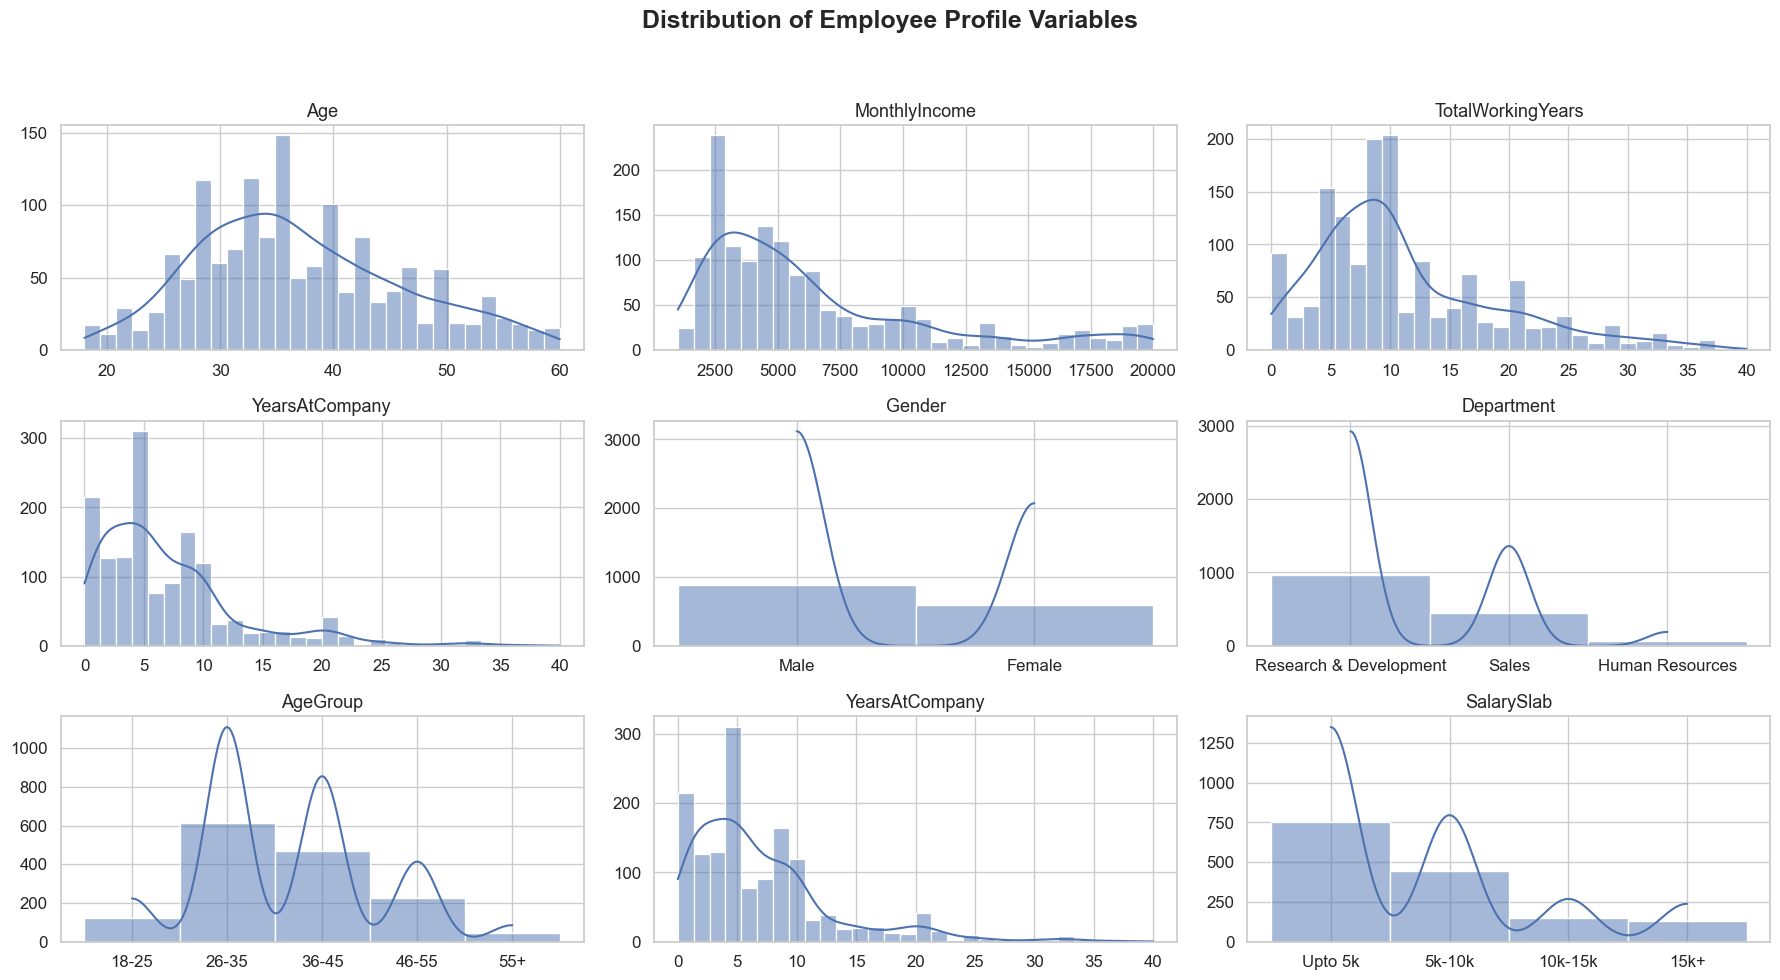

In [24]:
#EDA (Exploratory Data Analysis)

df.isnull().sum().sort_values(ascending=False) #Searching NULL values
df.describe().T

vars_profile = [
    "Age",
    "MonthlyIncome",
    "TotalWorkingYears",
    "YearsAtCompany",
    "Gender",
    "Department",
    "AgeGroup",
    "YearsAtCompany",
    "SalarySlab",
]

sns.set_theme(style="whitegrid", font_scale=1.1)

#Creating a figure 3x3 = 9 figures
fig, axes = plt.subplots(3, 3, figsize=(18, 10))

axes = axes.flatten()

for ax, var in zip(axes, vars_profile):
    
    #Histogram
    sns.histplot(
        data=df,
        x=var,
        bins=30,       
        kde=True,     
        ax=ax
    )
    
    # Individual Title
    ax.set_title(var, fontsize=13)
    
    ax.set_xlabel("")
    ax.set_ylabel("")

# Title
plt.suptitle(
    "Distribution of Employee Profile Variables",
    fontsize=18,
    fontweight="bold"
)

plt.tight_layout(rect=[0, 0, 1, 0.95])

#Show the graph
plt.show()




  AgeGroup   EducationField  count
0    18-25  Human Resources      2
1    18-25    Life Sciences     44
2    18-25        Marketing     10
3    18-25          Medical     42
4    18-25            Other     10


Text(0, 0.5, 'Count')

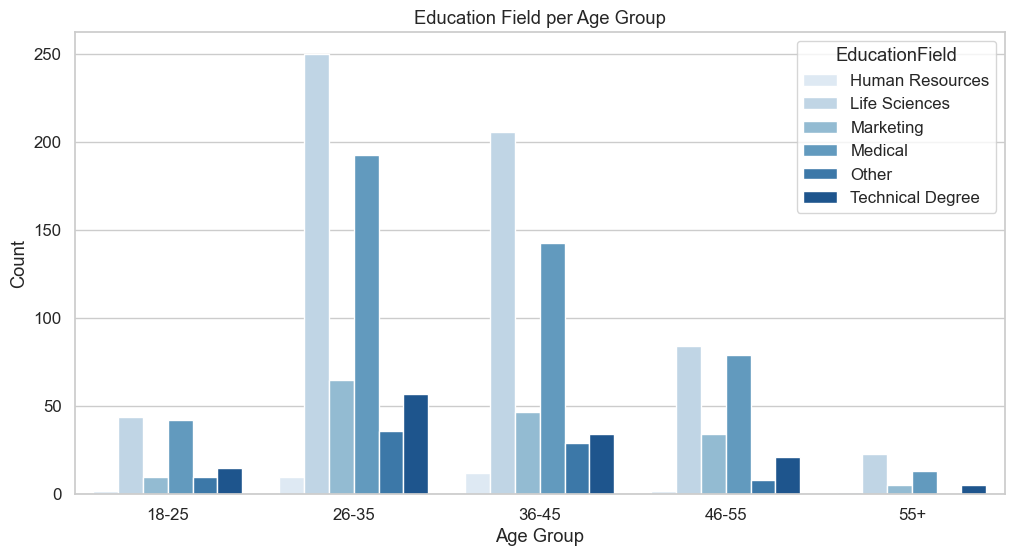

In [25]:
#Counting and ploting

counts = df.groupby(['AgeGroup', 'EducationField']).size().reset_index(name='count')
print(counts.head())
plt.figure(figsize=(12,6))

sns.barplot(
    data=counts,
    x='AgeGroup',
    y='count',
    hue='EducationField',
    palette = 'Blues'
)

plt.title ('Education Field per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')

  AgeGroup  EnvironmentSatisfaction  count
0    18-25                        1     28
1    18-25                        2     22
2    18-25                        3     34
3    18-25                        4     39
4    26-35                        1    105


Text(0, 0.5, 'Count')

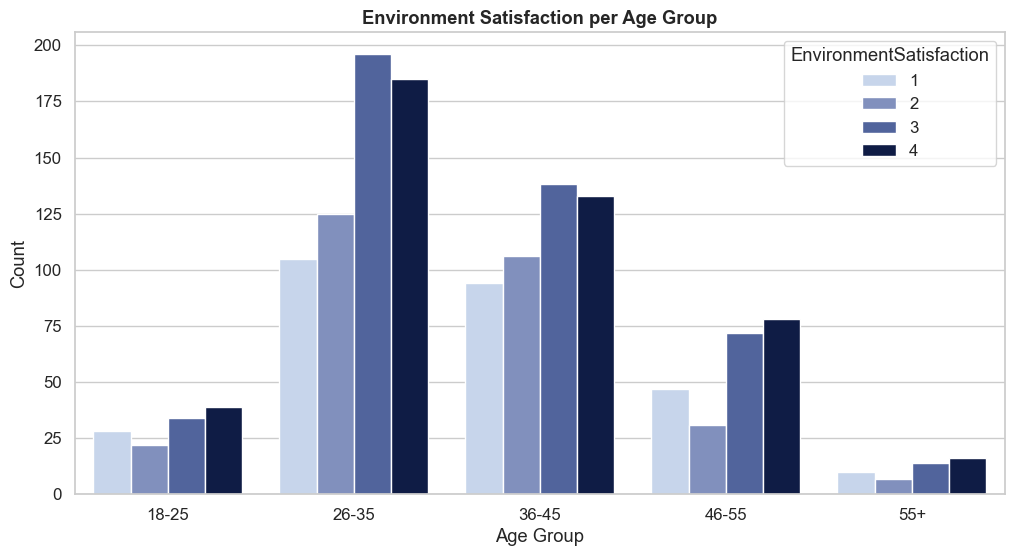

In [26]:
counts2 = df.groupby(['AgeGroup', 'EnvironmentSatisfaction']).size().reset_index(name='count')
print(counts2.head())
plt.figure(figsize=(12,6))

sns.barplot(
    data=counts2,
    x='AgeGroup',
    y='count',
    hue='EnvironmentSatisfaction',
    palette = ["#C1D4F1", "#778BC7", "#455EA8",  "#06184E"]
)

plt.title('Environment Satisfaction per Age Group',
          weight = 'bold')

plt.xlabel('Age Group')
plt.ylabel('Count')

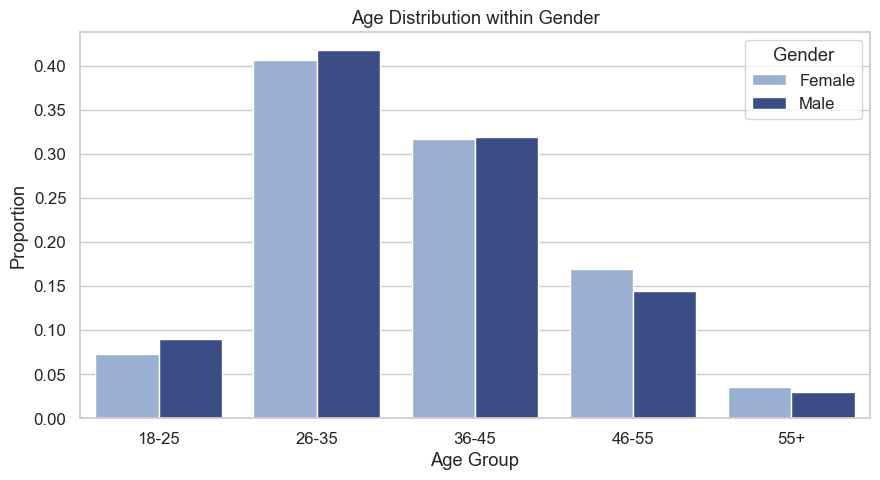

In [27]:


age_gender = (
    df
    .groupby(["Gender", "AgeGroup"])
    .size()
    .reset_index(name="count")
)

age_gender["prop"] = (
    age_gender
    .groupby("Gender")["count"]
    .transform(lambda x: x / x.sum())
)

plt.figure(figsize=(9,5))

sns.barplot(
    data=age_gender,
    x="AgeGroup",
    y="prop",
    hue="Gender",
    palette=["#91ADDA", "#2F4791"]
)

plt.title("Age Distribution within Gender")
plt.ylabel("Proportion")
plt.xlabel("Age Group")

plt.tight_layout()
plt.show()


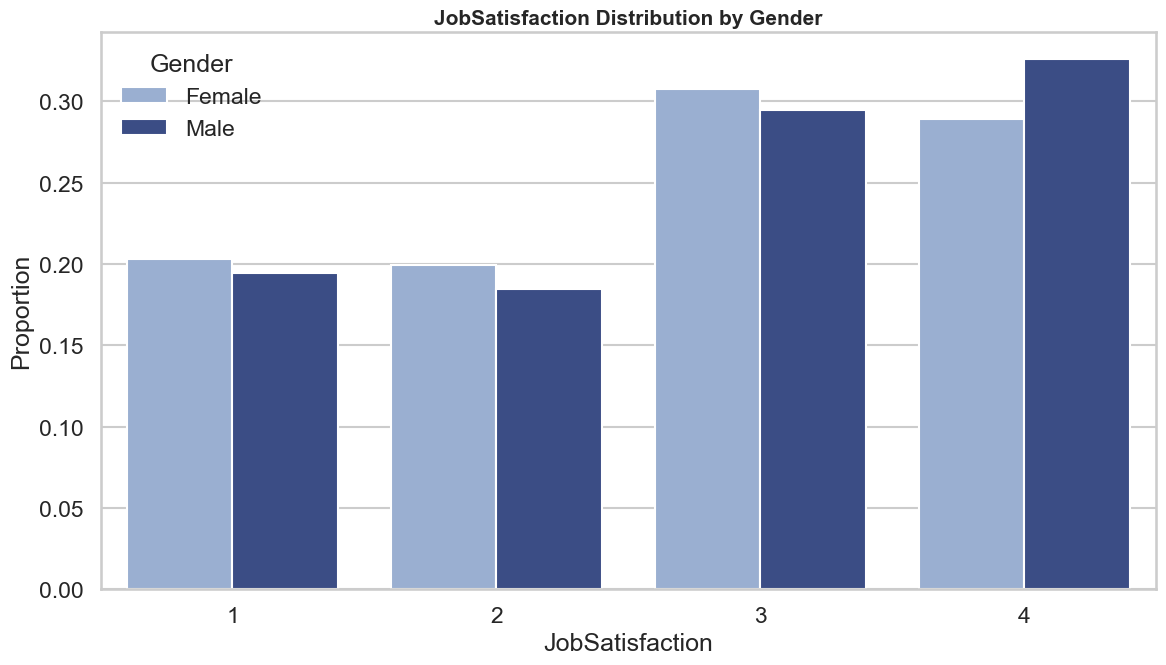

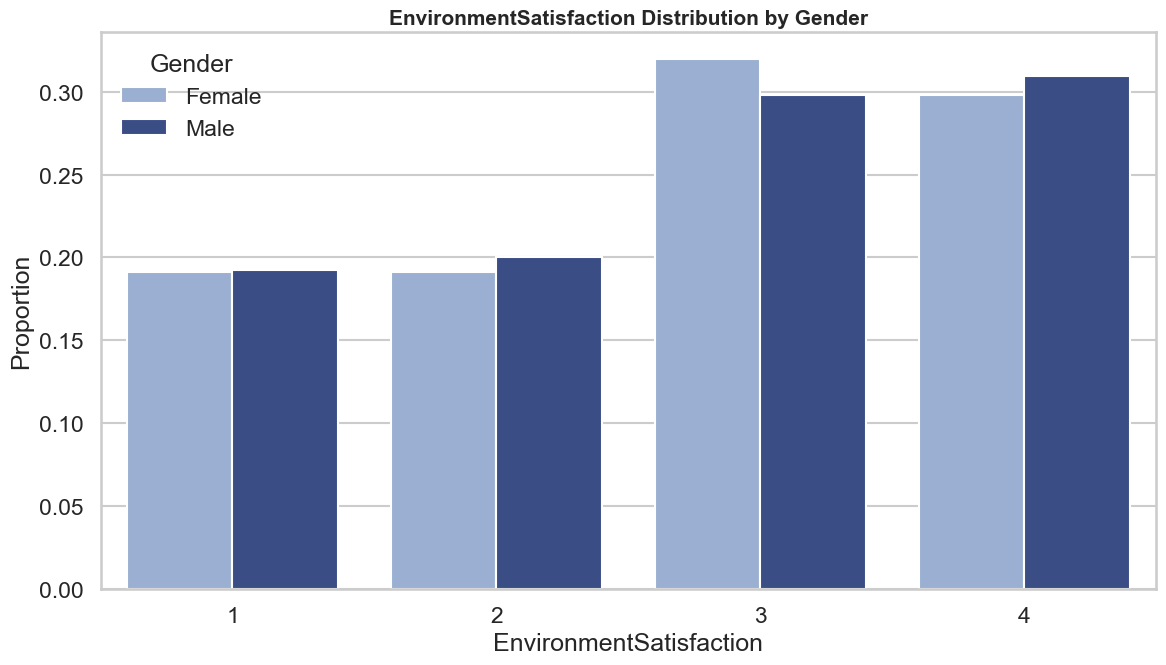

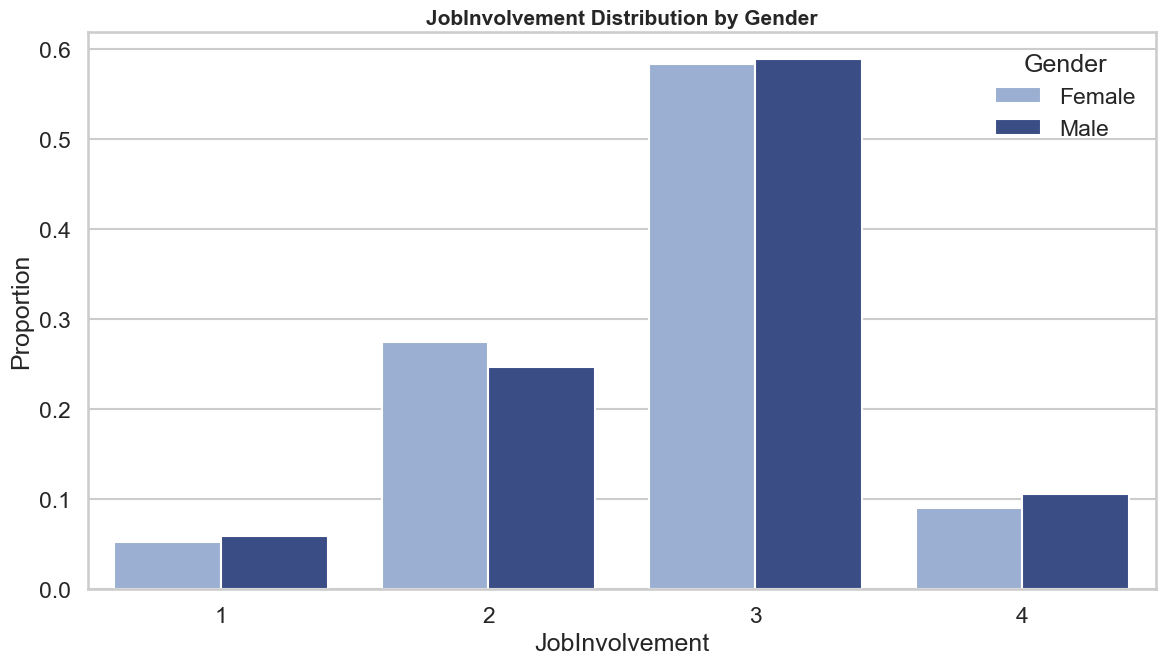

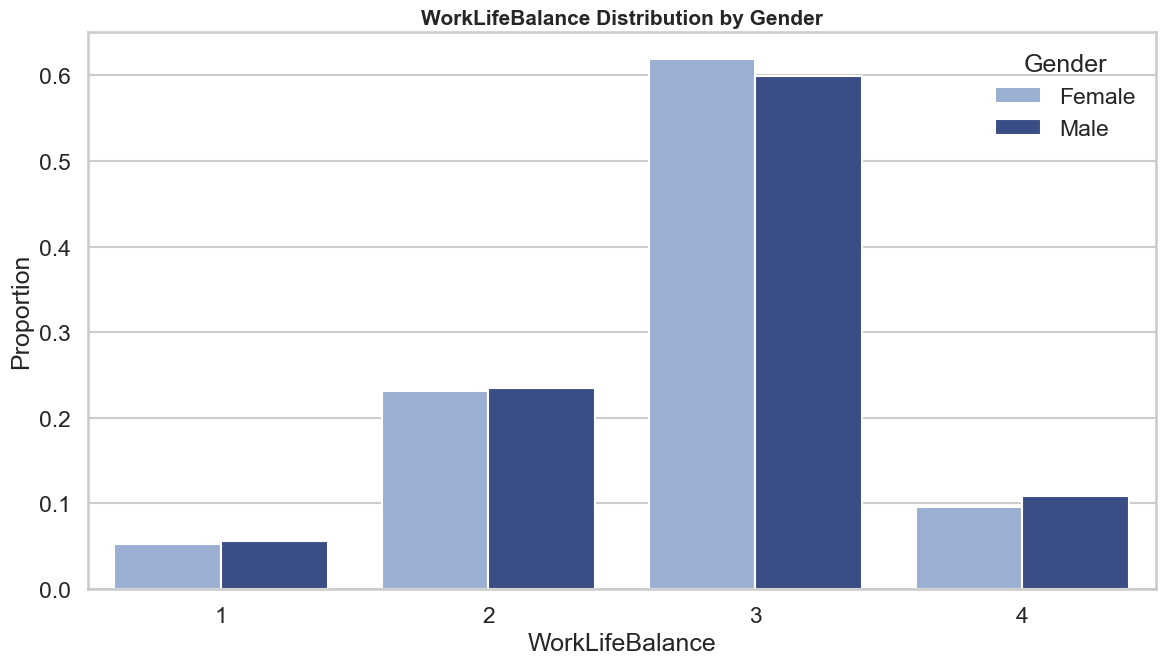

In [28]:

sns.set_theme(style="whitegrid", context="talk")

vars_ordinais = [
    "JobSatisfaction",
    "EnvironmentSatisfaction",
    "JobInvolvement",
    "WorkLifeBalance"
]


for var in vars_ordinais:

    tmp = df[["Gender", var]].dropna()
    tmp[var] = tmp[var].astype(int)
    tab = (
        tmp
        .groupby(["Gender", var])
        .size()
        .reset_index(name="count")
    )

    tab["prop"] = (
        tab
        .groupby("Gender")["count"]
        .transform(lambda x: x / x.sum())
    )


#Graph
    plt.figure(figsize=(12,7))

    sns.barplot(
        data=tab,
        x=var,
        y="prop",
        hue="Gender",
        palette=["#91ADDA", "#2F4791"]
    )

    plt.title(f"{var} Distribution by Gender", fontsize=15, fontweight="bold")
    plt.xlabel(var)
    plt.ylabel("Proportion")

    plt.legend(title="Gender", frameon=False)
    plt.tight_layout()
    plt.show()


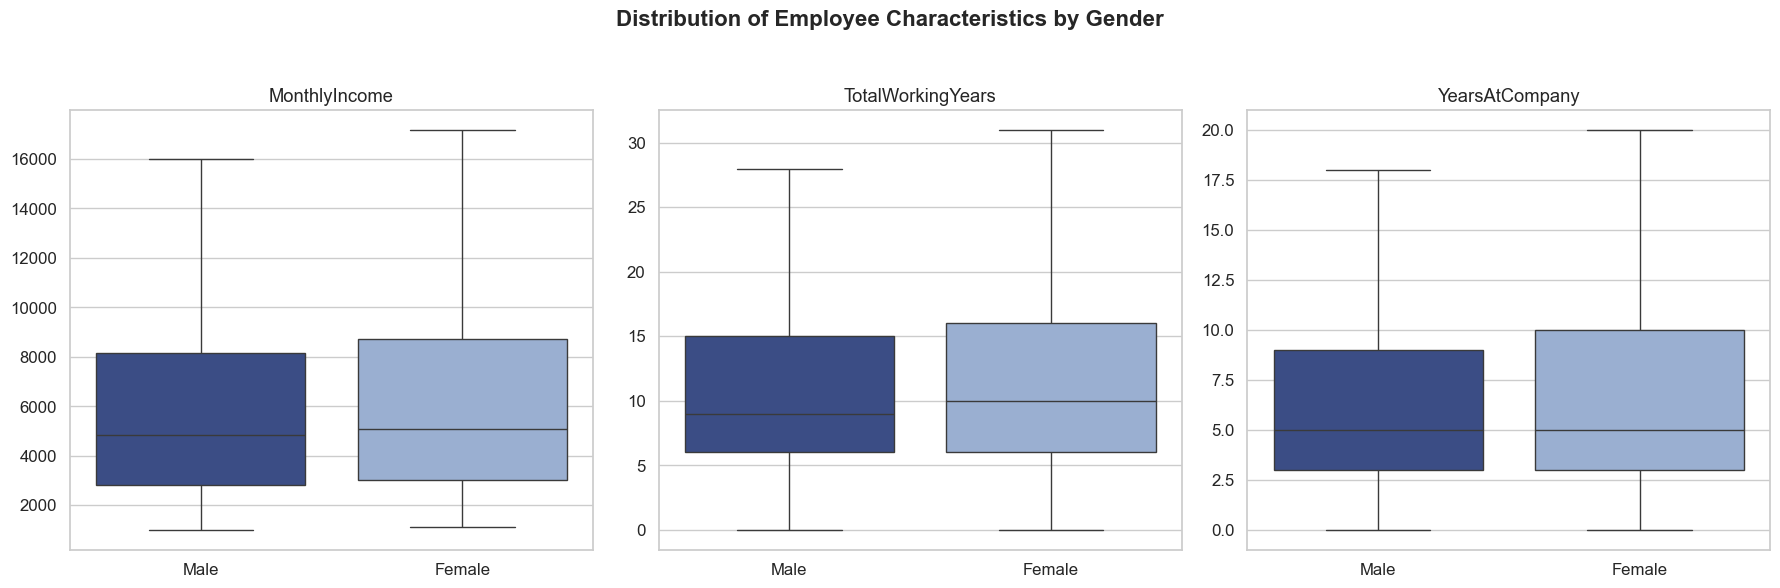

In [29]:

sns.set_theme(style="whitegrid", font_scale=1.1)

#Setting features to be analyzed
vars_gender = [
    "MonthlyIncome",
    "TotalWorkingYears",
    "YearsAtCompany"
]

# Creating graph
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, var in zip(axes, vars_gender):
    sns.boxplot(
        data=df,
        x="Gender",
        y=var,
        ax=ax,
        showfliers=False,
        palette=["#2F4791", "#91ADDA"]
    )
    
    ax.set_title(var)
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.suptitle(
    "Distribution of Employee Characteristics by Gender",
    fontsize=16,
    fontweight="bold",
)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


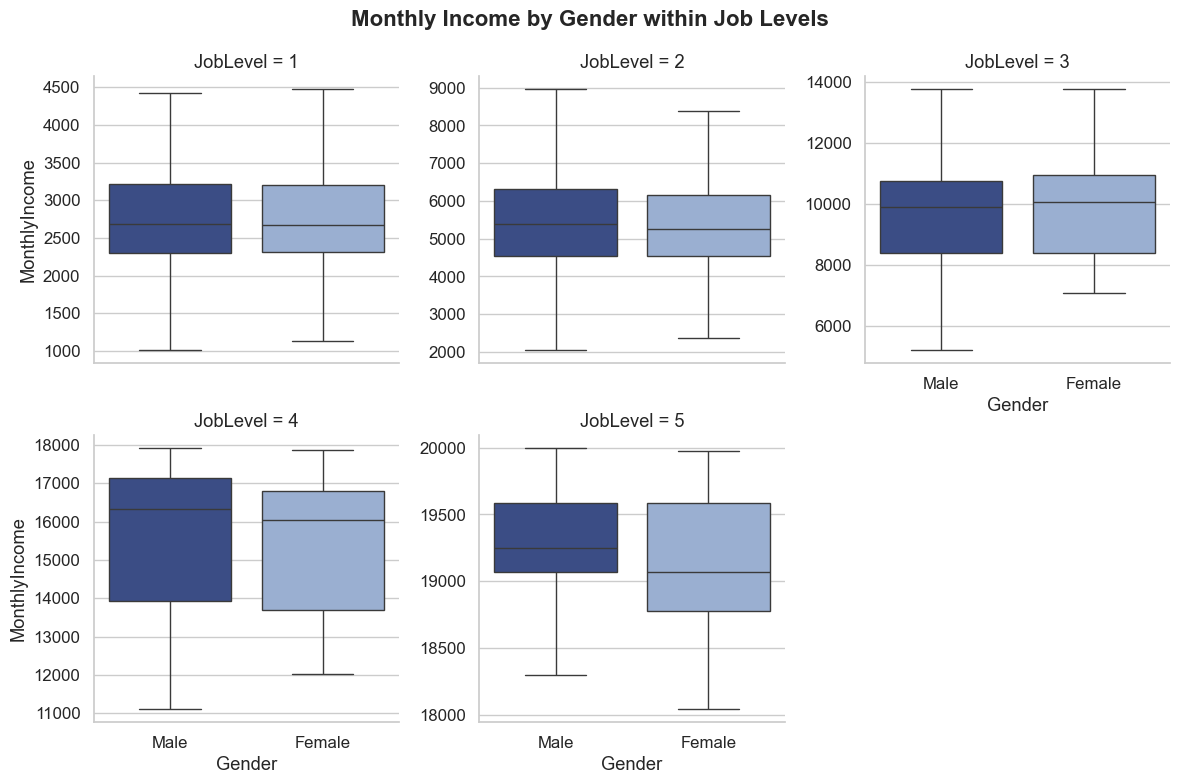

In [30]:
#It's seen that female gender shows greater median. Because of it, we are going to analyze if women are occupping greater joblevels

pd.crosstab(df['Gender'], df["JobLevel"])

# Another boxplot to see about the JobLevel and MonthlyIncome per Gender

g = sns.catplot(
       data=df,
    x="Gender",
    y="MonthlyIncome",
    col="JobLevel",
    kind="box",
    col_wrap=3,
    height=4,
    sharey=False,
    showfliers=False,
    palette=["#2F4791", "#91ADDA"]
)

g.fig.suptitle(
    "Monthly Income by Gender within Job Levels",
    fontsize=16,
    fontweight="bold"
)

plt.tight_layout()
plt.show()

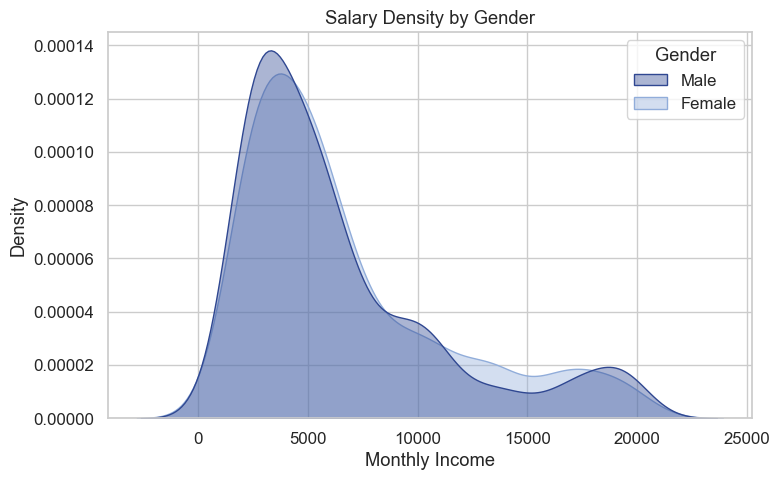

In [31]:
plt.figure(figsize=(8,5))

sns.kdeplot(
    data=df,
    x="MonthlyIncome",
    hue="Gender",
    fill=True,
    common_norm=False,
    alpha=0.4,
   palette=["#2F4791", "#91ADDA"]
)

plt.title("Salary Density by Gender")
plt.xlabel("Monthly Income")
plt.ylabel("Density")

plt.tight_layout()
plt.show()


In [32]:
#Analysing about the quantile to gain deeper understanding about the salaries and gender


df.groupby("Gender")["MonthlyIncome"].agg(
    median="median",
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75),
    iqr=lambda x: x.quantile(0.75) - x.quantile(0.25)
)


,median,q1,q3,iqr
Gender,,,,
Female,5070.0,3036.0,8737.5,5701.5
Male,4851.0,2821.0,8161.0,5340.0


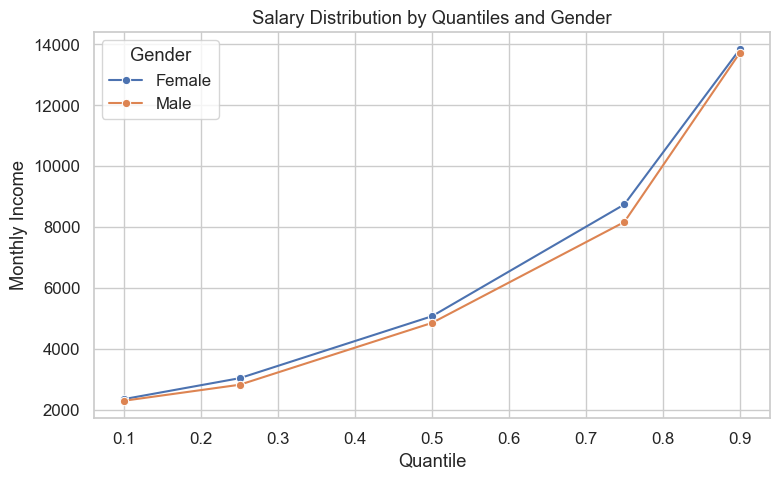

In [33]:
quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]

q_df = (
    df.groupby("Gender")["MonthlyIncome"]
    .quantile(quantiles)
    .reset_index()
)

plt.figure(figsize=(8,5))

sns.lineplot(
    data=q_df,
    x="level_1",
    y="MonthlyIncome",
    hue="Gender",
    marker="o"
)

plt.xlabel("Quantile")
plt.ylabel("Monthly Income")
plt.title("Salary Distribution by Quantiles and Gender")

plt.tight_layout()
plt.show()


In [34]:
#Choosing the features to start doing K-Means (Machine Learning)

features = [
    "Age",
    "MonthlyIncome",
    "NumCompaniesWorked",
    "JobSatisfaction",
    "WorkLifeBalance"
]  #The goal is not prediction, but behavioral segmentation of employees based on multidimensional characteristics. We want gain deeper knowledge about our employees


X = df[features].copy()
X= X.dropna()
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1480.0,36.917568,9.128559,18.0,30.00,36.0,43.00,60.0
MonthlyIncome,1480.0,6504.985811,4700.261400,1009.0,2922.25,4933.0,8383.75,19999.0
NumCompaniesWorked,1480.0,2.687162,2.494098,0.0,1.00,2.0,4.00,9.0
JobSatisfaction,1480.0,2.725000,1.104137,1.0,2.00,3.0,4.00,4.0
WorkLifeBalance,1480.0,2.760811,0.707024,1.0,2.00,3.0,3.00,4.0


In [35]:
from sklearn.preprocessing import StandardScaler #Standardizaiton ensures that all variables contribute equally 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [36]:
from sklearn.cluster import KMeans

inertias = []

for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)                             # Both suggested k = 3 as a reasonable trade-off between cohesion and separation


from sklearn.metrics import silhouette_score

diff_scores = []

for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    diff_scores.append(silhouette_score(X_scaled, labels))

In [37]:
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)


In [38]:
centroids = pd.DataFrame(
    kmeans.cluster_centers_,
    columns=features
)

centroids  #Cluster interpretation is based on standardized feature means, not on PCA projections. Here we can see about each features choosen


,Age,MonthlyIncome,NumCompaniesWorked,JobSatisfaction,WorkLifeBalance
0,-0.379780,-0.403307,-0.227377,-0.003154,0.549752
1,1.154163,1.298742,0.666762,-0.085732,0.095177
2,-0.301399,-0.394863,-0.155637,0.095049,-1.371028


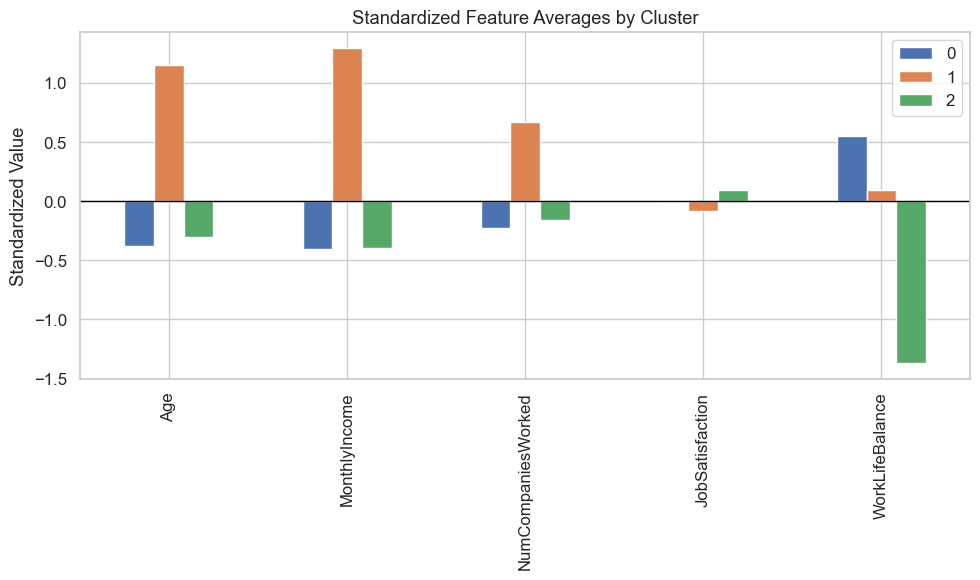

In [39]:
centroids.T.plot(
    kind="bar",
    figsize=(10,6)
)

plt.axhline(0, color="black", linewidth=1)
plt.title("Standardized Feature Averages by Cluster")
plt.ylabel("Standardized Value")
plt.tight_layout()
plt.show()


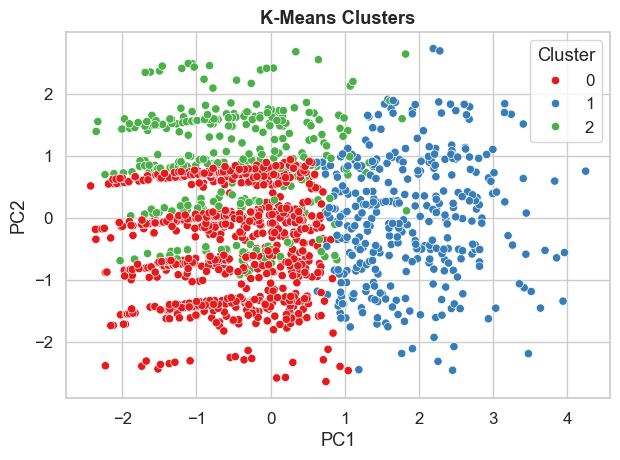

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df["PC1"] = X_pca[:,0]
df["PC2"] = X_pca[:,1]


sns.scatterplot(
    data=df,
    x="PC1",
    y="PC2",
    hue="Cluster",
    palette="Set1"
)

plt.title("K-Means Clusters", weight = 'bold')
plt.tight_layout()
plt.show()


In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca.explained_variance_ratio_

#Here, we're analyzing PCA explains the dataset

array([0.33120515, 0.20424487])

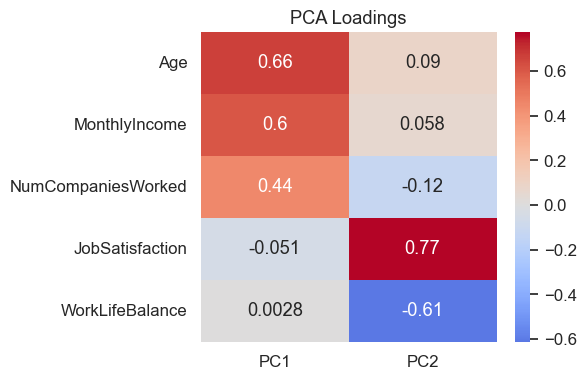

In [42]:

loadings = pd.DataFrame(
    pca.components_.T,
    index=X.columns,
    columns=['PC1', 'PC2']
)

loadings

plt.figure(figsize=(6,4))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.title("PCA Loadings")
plt.tight_layout()
plt.show()


#Analyzing how the weight of each variable influences in PCA